In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

In [31]:
# Assuming 'weight' and 'obese' are already defined
weights = np.sort(np.random.normal(loc=172, scale=29, size=num_samples))
obese = np.where(np.random.rand(num_samples) < (np.argsort(weights) / num_samples), 1, 0)

# Reshape 'weights' for compatibility with scikit-learn
weights_reshaped = weights.reshape(-1, 1)

In [32]:
# Fit logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(weights_reshaped, obese)

LogisticRegression()

In [33]:
# Predict probabilities and plot the logistic curve
weights_for_plot = np.linspace(min(weights), max(weights), num_samples).reshape(-1, 1)
probabilities_logreg = logreg_model.predict_proba(weights_for_plot)[:, 1]

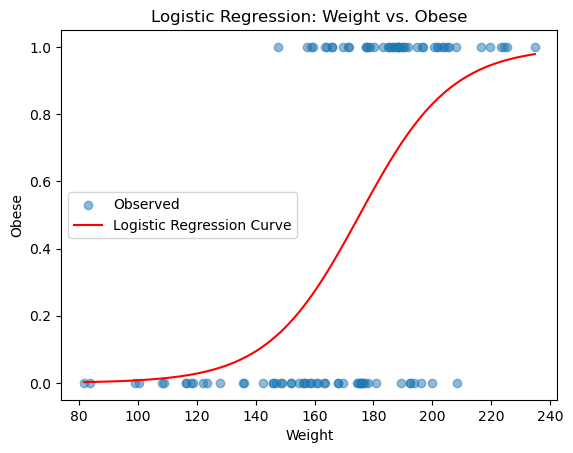

In [34]:
# Predict probabilities and plot the logistic curve
weights_for_plot = np.linspace(min(weights), max(weights), num_samples).reshape(-1, 1)
probabilities_logreg = logreg_model.predict_proba(weights_for_plot)[:, 1]

plt.scatter(weights, obese, label='Observed', alpha=0.5)
plt.plot(weights_for_plot, probabilities_logreg, color='red', label='Logistic Regression Curve')

plt.xlabel('Weight')
plt.ylabel('Obese')
plt.title('Logistic Regression: Weight vs. Obese')
plt.legend()
plt.show()


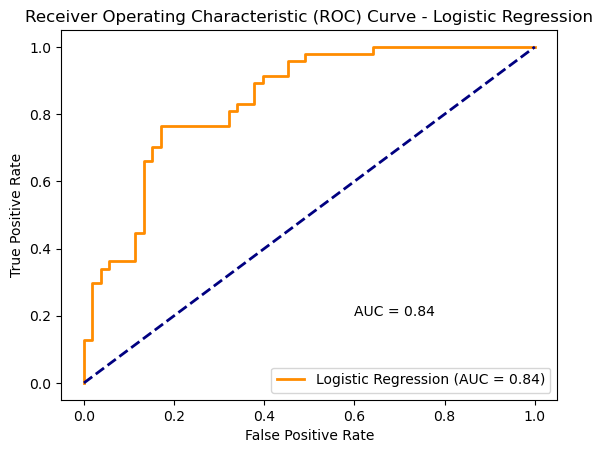

In [35]:
# Compute ROC curve and AUC for logistic regression
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(obese, probabilities_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Plot ROC curve with AUC value for logistic regression
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_logreg))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.text(0.6, 0.2, 'AUC = {:.2f}'.format(roc_auc_logreg), bbox=dict(facecolor='white', edgecolor='white'))
plt.show()


In [36]:
# Fit SVM model
svm_model = SVC(probability=True)
svm_model.fit(weights_reshaped, obese)

SVC(probability=True)

In [37]:
# Predict probabilities on the original data
probabilities_svm = svm_model.predict_proba(weights_reshaped)[:, 1]

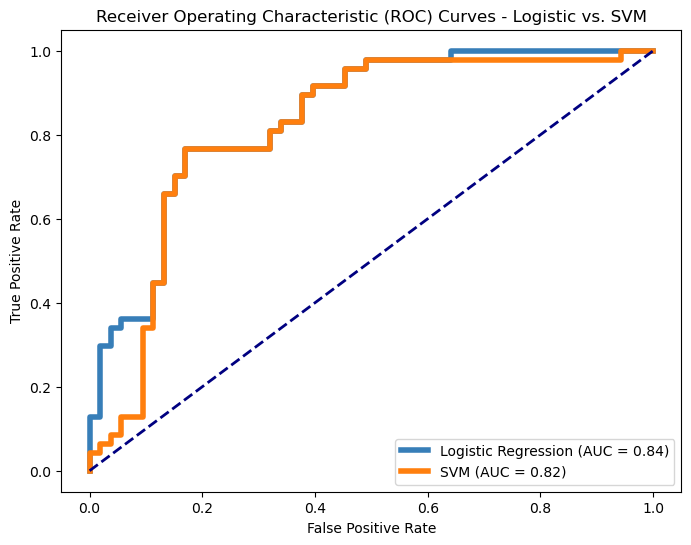

In [38]:
# Compute ROC curve and AUC for SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(obese, probabilities_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='#377eb8', lw=4, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_logreg))
plt.plot(fpr_svm, tpr_svm, color='#ff7f0e', lw=4, label='SVM (AUC = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves - Logistic vs. SVM')
plt.legend(loc='lower right')
plt.show()
